In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

from rayopt import system_from_text, Analysis, FiniteConjugate, InfiniteConjugate

np.set_printoptions(precision=3)

Populating the interactive namespace from numpy and matplotlib


In [2]:
description = "100x, NA=0.95, 0.2mm, flat field, Asoma Y, USP 4505553"
columns = "type roc distance diameter material"
text = """
    S       0       0   2 AIR
    S -2.3622     100   3 NBFD5
    S  2.1018   .4837   3 FDS9
    S -19.048  1.1751   3 AIR
    A       0  1.5667 1.4 AIR
    S  44.066       0   3 LAK14
    S  2.7780     .47   3 CAF2
    S -2.7783   2.701   3 KZFSN4
    S -5.2938   .5288   3 AIR
    S  8.7579   .0588   3 CAF2
    S -8.7564  1.4576   3 AIR
    S  4.7338   .0588   3 CAF2
    S -5.0227  2.3913   3 KZFSN5
    S  2.9515   .8965   3 PHM51
    S -7.6840  2.1552   3 AIR
    S  2.5702   .0588   3 FPL51
    S  4.5203  1.1507   3 AIR
    S  1.0734   .0459   3 SK14
    S   .8353  1.2473   3 AIR
    S       0   .3381   3 AIR
    """

In [3]:
description = "60x, f=3, wd=0.14, NA=1.4, oil immersion, f=3, US5517360"
columns = "type roc distance radius material"
#.15   1.3325/73  S 0        0.0005 
text = """
S 0        0      .15   1.521/56.02
S 0        0.17   1     1.51548/43.1
S 0        0.14   0.738 1.51633/64.15
S -1.8192  0.6    1.165 1.883/40.78
S -3.2177  3.84   3.217 AIR
S -20.4857 0.1    4.744 1.56907/71.3
S -8.7588  2.1418 5.181 AIR
S 11.0685  0.3    6.329 1.497/81.61
S -10.4406 5.3    6.251 1.6134/43.84
S 18.9938  1      6.237 1.43875/94.97
S -17.4921 4.5    6.324 AIR
S 25.511   0.15   6.081 1.6765/37.54
S 6.4981   1      5.519 1.43875/94.97
S -16.9602 6.5    5.638 1.74/31.71
S -37.6734 1      5.789 AIR
S 8.7662   0.3    5.971 1.456/90.31
S 145.8837 3.1    5.769 AIR
S 7.866    0.15   5.13  1.618/63.38
S -8.8483  5.734  3.554 1.6765/37.54
S 3.0648   1      2.284 AIR
S -3.4631  3.2    2.127 1.74/31.71
S 270.3729 2.0409 2.839 1.80518/25.43
S -8.4836  6.7011 4.206 AIR
A 0        0      3.9   AIR
"""

tube = """
S 68.7541   56     15 1.48749/70.2 
S -37.5679  7.7321 15 1.8061/40.95 
S -102.8477 3.4742 15 AIR
S 84.3099   0.6973 15 1.834/37.16
S -50.71    6.0238 15 1.6445/40.82 
S 40.6619   3.0298 15 AIR
S 0         126    10 AIR
"""

#text += tube

In [4]:
s = system_from_text(text, columns.split(),
    description=description)
s.object = FiniteConjugate(radius=s[0].radius, na=1.4)
s.stop = 3
s.update()
if True:
    s.reverse()
    s.object = InfiniteConjugate(angle_deg=2)
    s[1].distance = 10
    #s.stop += 7
    #s.object.radius = 5
    #s[1].distance = 160
    s.update()
print(s)

System: 60x, f=3, wd=0.14, NA=1.4, oil immersion, f=3, US5517360
Scale: 1.0 mm
Wavelengths: 588, 656, 486 nm
Object:
 Index: 1
 Entrance: 8.41 dia at 10
 Semi-Angle: 2
Image:
 Index: 1.52
 Entrance: 2 dia at 0.17
 Radius: 0.15
 NA: 1.4
Stop: 3
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf        7.8         basic/air   1.000     nan     nan
 1 S         10      8.484      8.412                 -   1.805     nan     nan
 2 S     6.7011     -270.4      5.678                 -   1.740     nan     nan
 3 S     2.0409      3.463      4.254         basic/air   1.000     nan     nan
 4 S        3.2     -3.065      4.568                 -   1.677     nan     nan
 5 S          1      8.848      7.108                 -   1.618     nan     nan
 6 S      5.734     -7.866      10.26         basic/air   1.000     nan     nan
 7 S       0.15     -145.9     11.538                 -   1.456     nan     nan
 8 S        3.1     -8.766

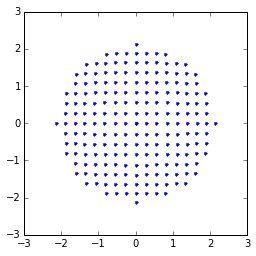

In [5]:
from rayopt import ParaxialTrace, GeometricTrace

p = ParaxialTrace(s)
p.update_conjugates()
g = GeometricTrace(s)
g.rays_point((0, 0), distribution="square", nrays=250)

fig, ax = plt.subplots()
ai = s.stop
ax.plot(g.y[ai, :, 0], g.y[ai, :, 1], ".")
ax.set_aspect("equal")

(-2, 2)

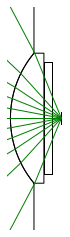

In [6]:
fig, ax = plt.subplots()
s.plot(ax)
g = GeometricTrace(s)
g.rays_point((0, 0))
g.plot(ax)
ax.set_xlim(58, 59)
ax.set_ylim(-2, 2)

/home/rj/work/nist/pyrayopt/rayopt/paraxial_trace.py:254: RuntimeWarning: divide by zero encountered in true_divide
  return self.n.take((0, -2))/(2*na)
/home/rj/work/nist/pyrayopt/rayopt/paraxial_trace.py:259: RuntimeWarning: divide by zero encountered in true_divide
  return 1.22*self.l/(2*na)/self.system.scale
/home/rj/work/nist/pyrayopt/rayopt/elements.py:333: RuntimeWarning: invalid value encountered in sqrt
  g = -a + np.sign(mu)*np.sqrt(np.square(a) - b)
/home/rj/work/nist/pyrayopt/rayopt/elements.py:196: RuntimeWarning: invalid value encountered in less_equal
  good = np.square(y[:, :2]).sum(1) <= self.radius**2
/home/rj/work/nist/pyrayopt/rayopt/analysis.py:408: RuntimeWarning: invalid value encountered in true_divide
  xd = (a[1] - h)/h


System: 60x, f=3, wd=0.14, NA=1.4, oil immersion, f=3, US5517360
Scale: 1.0 mm
Wavelengths: 588, 656, 486 nm
Object:
 Index: 1
 Entrance: 8.41 dia at 10
 Pupil: 7.93 dia at 19.1
 Semi-Angle: 2
Image:
 Index: 1.52
 Entrance: 2 dia at 0.174
 Pupil: 1.06 dia at -0.61
 Radius: 0.105
 NA: -0.998
Stop: 3
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf        7.8         basic/air   1.000     nan     nan
 1 S         10      8.484      8.412                 -   1.805     nan     nan
 2 S     6.7011     -270.4      5.678                 -   1.740     nan     nan
 3 S     2.0409      3.463      4.254         basic/air   1.000     nan     nan
 4 S        3.2     -3.065      4.568                 -   1.677     nan     nan
 5 S          1      8.848      7.108                 -   1.618     nan     nan
 6 S      5.734     -7.866      10.26         basic/air   1.000     nan     nan
 7 S       0.15     -145.9     11.538             

/home/rj/work/nist/pyrayopt/rayopt/analysis.py:424: RuntimeWarning: invalid value encountered in true_divide
  z = -t.y[-1, :, 1]/tanarcsin(t.i[-1])[:, 1]


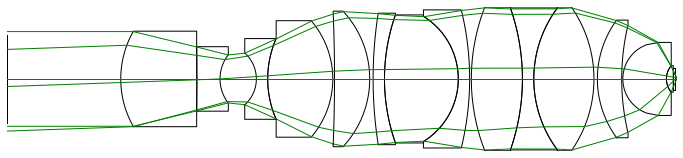

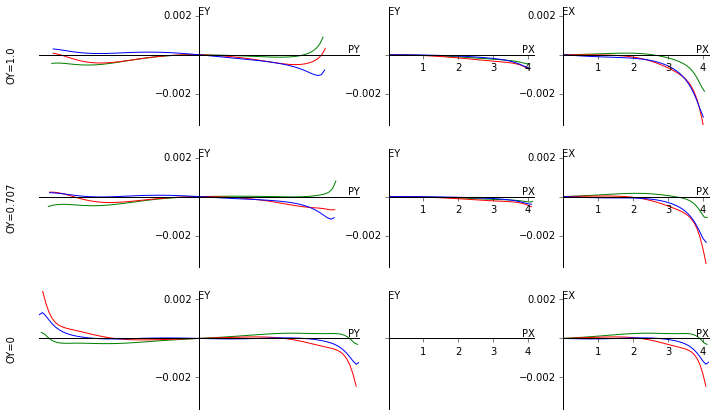

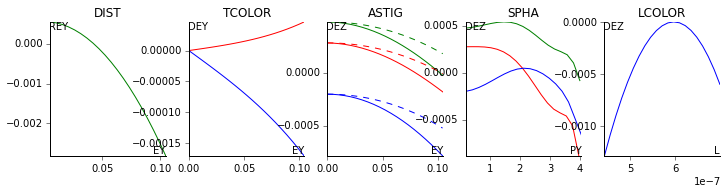

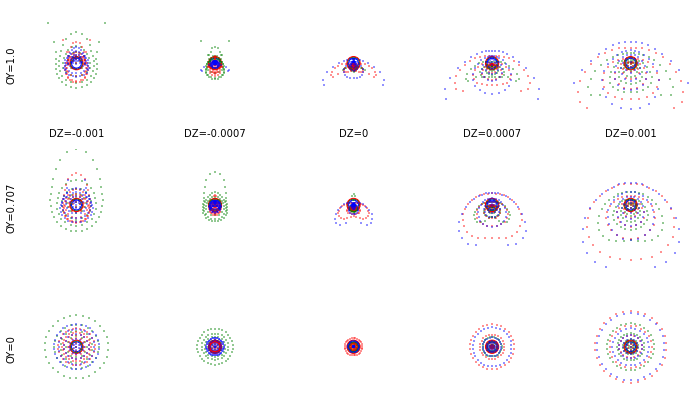

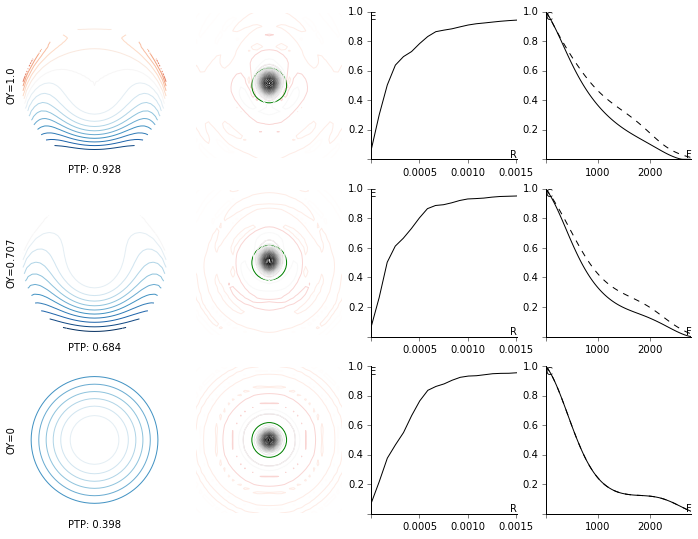

In [7]:
a = Analysis(s, resize=False)
#a.figures[0].axes[0].set_xlim(220, 253)
#a.figures[0].axes[0].set_ylim(-7, 7)
#a.figures[0].axes[0].set_xlim(-2, 52)
#a.figures[0].set_figheight(10)

In [ ]:
from scipy import optimize

curvs = [2, 8, 9, 10, 11, 14, 15, 16, 17, 18]
dist = []

def merit(p):
    p = list(p)
    for i in curvs:
        s[i].curvature = p.pop(0)
    for i in dist:
        s[i].distance = p.pop(0)
    m = []
    p = ParaxialTrace(s)
    for h in 0., .7, 1.:
        t2 = FullTrace(s)
        t2.rays_paraxial_point(p, (h, 0), nrays=17,
                               distribution="tee", aim=False)
        t2.propagate(clip=False)
        y = t2.y[-1, :, :2]
        m.extend((y - y.mean(axis=0)[None, :]).ravel())
    return m

p0 = [s[i].curvature for i in curvs]
p0 += [s[i].distance for i in dist]

p, cov, ifo, msg, it = optimize.leastsq(merit, p0,
        full_output=True, epsfcn=1e-6, maxfev=300)
print p, msg
merit(p)
None